In [1]:
from utils.helper import Helper
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import applications
from efficientnet.tfkeras import EfficientNetB3

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import cm
import pandas as pd

## Test Using Alpha

In [2]:
h = Helper('topomaps/train/alpha/', 'topomaps/test/alpha/')

train_it, test_it = h.construct_data_generator()

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [2]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(16, (3,3), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides = (2,2)))
    model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [5]:
opt = Adam(learning_rate=0.00001)
loss = 'categorical_crossentropy'


model = build_model(opt, loss, 'cnn_topomap_classification_model')

Model: "cnn_topomap_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None

In [5]:
r = model.fit_generator(train_it, epochs=40, validation_data=test_it)

Epoch 1/40
313/313 [==============================] - 114s 364ms/step - loss: 0.7137 - accuracy: 0.5204 - val_loss: 0.6982 - val_accuracy: 0.4989
Epoch 2/40
313/313 [==============================] - 111s 356ms/step - loss: 0.7076 - accuracy: 0.4935 - val_loss: 0.6971 - val_accuracy: 0.5011
Epoch 3/40
313/313 [==============================] - 111s 355ms/step - loss: 0.6997 - accuracy: 0.4932 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 4/40
313/313 [==============================] - 112s 356ms/step - loss: 0.6980 - accuracy: 0.4301 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/40
313/313 [==============================] - 112s 357ms/step - loss: 0.6977 - accuracy: 0.4780 - val_loss: 0.6944 - val_accuracy: 0.4989
Epoch 6/40
313/313 [==============================] - 112s 358ms/step - loss: 0.6966 - accuracy: 0.4236 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 7/40
313/313 [==============================] - 112s 358ms/step - loss: 0.7012 - accuracy: 0.5025 - val_loss: 0.6931 -

## Test Using Beta

In [6]:
h = Helper('topomaps/train/beta/', 'topomaps/test/beta/')

train_it, test_it = h.construct_data_generator()

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [8]:
r = model.fit_generator(train_it, epochs=80, validation_data=test_it)

Epoch 1/80
313/313 [==============================] - 112s 358ms/step - loss: 0.7091 - accuracy: 0.5387 - val_loss: 0.7341 - val_accuracy: 0.4989
Epoch 2/80
313/313 [==============================] - 110s 350ms/step - loss: 0.6988 - accuracy: 0.5109 - val_loss: 0.7235 - val_accuracy: 0.5011
Epoch 3/80
313/313 [==============================] - 110s 352ms/step - loss: 0.7011 - accuracy: 0.5060 - val_loss: 0.7003 - val_accuracy: 0.4989
Epoch 4/80
313/313 [==============================] - 110s 352ms/step - loss: 0.6966 - accuracy: 0.4252 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/80
313/313 [==============================] - 110s 352ms/step - loss: 0.6959 - accuracy: 0.4848 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 6/80
313/313 [==============================] - 110s 351ms/step - loss: 0.6956 - accuracy: 0.4585 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 7/80
313/313 [==============================] - 110s 352ms/step - loss: 0.6979 - accuracy: 0.4729 - val_loss: 0.6931 -

Epoch 57/80
313/313 [==============================] - 111s 353ms/step - loss: 0.6027 - accuracy: 0.6542 - val_loss: 0.6129 - val_accuracy: 0.6479
Epoch 58/80
313/313 [==============================] - 111s 354ms/step - loss: 0.6004 - accuracy: 0.6554 - val_loss: 0.6100 - val_accuracy: 0.6521
Epoch 59/80
313/313 [==============================] - 110s 351ms/step - loss: 0.5925 - accuracy: 0.6641 - val_loss: 0.6079 - val_accuracy: 0.6572
Epoch 60/80
313/313 [==============================] - 110s 352ms/step - loss: 0.5955 - accuracy: 0.6602 - val_loss: 0.6081 - val_accuracy: 0.6544
Epoch 61/80
313/313 [==============================] - 110s 352ms/step - loss: 0.5823 - accuracy: 0.6760 - val_loss: 0.6079 - val_accuracy: 0.6545
Epoch 62/80
313/313 [==============================] - 110s 351ms/step - loss: 0.5876 - accuracy: 0.6667 - val_loss: 0.6137 - val_accuracy: 0.6433
Epoch 63/80
313/313 [==============================] - 110s 352ms/step - loss: 0.5899 - accuracy: 0.6641 - val_loss: 0

## Test Using Gamma

In [4]:
h = Helper('topomaps/train/gamma/', 'topomaps/test/gamma/')

train_it, test_it = h.construct_data_generator()

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [5]:
r = model.fit_generator(train_it, epochs=80, validation_data=test_it)

Epoch 1/80
313/313 [==============================] - 111s 354ms/step - loss: 0.7201 - accuracy: 0.5013 - val_loss: 0.6929 - val_accuracy: 0.5011
Epoch 2/80
313/313 [==============================] - 109s 347ms/step - loss: 0.6959 - accuracy: 0.5376 - val_loss: 0.6929 - val_accuracy: 0.5024
Epoch 3/80
313/313 [==============================] - 109s 347ms/step - loss: 0.6990 - accuracy: 0.4631 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 4/80
313/313 [==============================] - 109s 347ms/step - loss: 0.6965 - accuracy: 0.5261 - val_loss: 0.7022 - val_accuracy: 0.4989
Epoch 5/80
313/313 [==============================] - 109s 348ms/step - loss: 0.6986 - accuracy: 0.4976 - val_loss: 0.6926 - val_accuracy: 0.5022
Epoch 6/80
313/313 [==============================] - 109s 347ms/step - loss: 0.6957 - accuracy: 0.4772 - val_loss: 0.6929 - val_accuracy: 0.5023
Epoch 7/80
313/313 [==============================] - 109s 348ms/step - loss: 0.6948 - accuracy: 0.4993 - val_loss: 0.7083 -

Epoch 57/80
313/313 [==============================] - 109s 348ms/step - loss: 0.5404 - accuracy: 0.7131 - val_loss: 0.5817 - val_accuracy: 0.6764
Epoch 58/80
313/313 [==============================] - 109s 348ms/step - loss: 0.5369 - accuracy: 0.7150 - val_loss: 0.5793 - val_accuracy: 0.6794
Epoch 59/80
313/313 [==============================] - 109s 348ms/step - loss: 0.5282 - accuracy: 0.7218 - val_loss: 0.6113 - val_accuracy: 0.6525
Epoch 60/80
313/313 [==============================] - 110s 352ms/step - loss: 0.5264 - accuracy: 0.7258 - val_loss: 0.5659 - val_accuracy: 0.6922
Epoch 61/80
313/313 [==============================] - 110s 350ms/step - loss: 0.5356 - accuracy: 0.7172 - val_loss: 0.5627 - val_accuracy: 0.6894
Epoch 62/80
313/313 [==============================] - 111s 354ms/step - loss: 0.5290 - accuracy: 0.7201 - val_loss: 0.6099 - val_accuracy: 0.6515
Epoch 63/80
313/313 [==============================] - 113s 361ms/step - loss: 0.5270 - accuracy: 0.7232 - val_loss: 0

## Test Using Combined

In [4]:
h = Helper('topomaps/train/combined/', 'topomaps/test/combined/')

train_it, test_it = h.construct_data_generator()

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [5]:
model.fit_generator(train_it, epochs=150, validation_data=test_it)

Epoch 1/150
313/313 [==============================] - 106s 339ms/step - loss: 0.7115 - accuracy: 0.5126 - val_loss: 0.6950 - val_accuracy: 0.5011
Epoch 2/150
313/313 [==============================] - 105s 335ms/step - loss: 0.7004 - accuracy: 0.4334 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6995 - accuracy: 0.4690 - val_loss: 0.6968 - val_accuracy: 0.4989
Epoch 4/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6962 - accuracy: 0.5203 - val_loss: 0.6937 - val_accuracy: 0.5011
Epoch 5/150
313/313 [==============================] - 105s 337ms/step - loss: 0.6936 - accuracy: 0.5321 - val_loss: 0.6943 - val_accuracy: 0.4989
Epoch 6/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6961 - accuracy: 0.4882 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 7/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6952 - accuracy: 0.5001 - val_loss: 0

313/313 [==============================] - 105s 337ms/step - loss: 0.1934 - accuracy: 0.9256 - val_loss: 0.4825 - val_accuracy: 0.7960
Epoch 112/150
313/313 [==============================] - 105s 336ms/step - loss: 0.1925 - accuracy: 0.9272 - val_loss: 0.4779 - val_accuracy: 0.7976
Epoch 113/150
313/313 [==============================] - 105s 336ms/step - loss: 0.1923 - accuracy: 0.9266 - val_loss: 0.5003 - val_accuracy: 0.7947
Epoch 114/150
313/313 [==============================] - 105s 336ms/step - loss: 0.1818 - accuracy: 0.9300 - val_loss: 0.4771 - val_accuracy: 0.8020
Epoch 115/150
313/313 [==============================] - 105s 336ms/step - loss: 0.1799 - accuracy: 0.9319 - val_loss: 0.4943 - val_accuracy: 0.7998
Epoch 116/150
313/313 [==============================] - 105s 337ms/step - loss: 0.1671 - accuracy: 0.9389 - val_loss: 0.8158 - val_accuracy: 0.7161
Epoch 117/150
313/313 [==============================] - 105s 337ms/step - loss: 0.1731 - accuracy: 0.9355 - val_loss: 0

## Test Using Combined (15 vs 3)

In [4]:
h = Helper('topomaps_15vs3/train/combined/', 'topomaps_15vs3/test/combined/')

train_it, test_it = h.construct_data_generator()

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [5]:
r = model.fit_generator(train_it, epochs=150, validation_data=test_it)

Epoch 1/150
313/313 [==============================] - 107s 342ms/step - loss: 0.7170 - accuracy: 0.4820 - val_loss: 0.6934 - val_accuracy: 0.5011
Epoch 2/150
313/313 [==============================] - 105s 336ms/step - loss: 0.7043 - accuracy: 0.4852 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 3/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6983 - accuracy: 0.4600 - val_loss: 0.6937 - val_accuracy: 0.4989
Epoch 4/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6968 - accuracy: 0.5103 - val_loss: 0.7033 - val_accuracy: 0.5011
Epoch 5/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6964 - accuracy: 0.4930 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 6/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6967 - accuracy: 0.4965 - val_loss: 0.6942 - val_accuracy: 0.4989
Epoch 7/150
313/313 [==============================] - 106s 337ms/step - loss: 0.6968 - accuracy: 0.5020 - val_loss: 0

313/313 [==============================] - 106s 338ms/step - loss: 0.3091 - accuracy: 0.8682 - val_loss: 0.5431 - val_accuracy: 0.7348
Epoch 112/150
313/313 [==============================] - 106s 338ms/step - loss: 0.3082 - accuracy: 0.8688 - val_loss: 0.5640 - val_accuracy: 0.7329
Epoch 113/150
313/313 [==============================] - 106s 338ms/step - loss: 0.3034 - accuracy: 0.8707 - val_loss: 0.5391 - val_accuracy: 0.7408
Epoch 114/150
313/313 [==============================] - 106s 338ms/step - loss: 0.2893 - accuracy: 0.8795 - val_loss: 0.5520 - val_accuracy: 0.7322
Epoch 115/150
313/313 [==============================] - 106s 338ms/step - loss: 0.2857 - accuracy: 0.8807 - val_loss: 0.6117 - val_accuracy: 0.7124
Epoch 116/150
313/313 [==============================] - 106s 338ms/step - loss: 0.2908 - accuracy: 0.8759 - val_loss: 0.5541 - val_accuracy: 0.7342
Epoch 117/150
313/313 [==============================] - 106s 338ms/step - loss: 0.2758 - accuracy: 0.8864 - val_loss: 0

In [6]:
model.save("test_model_15vs3.h5")

## Test Using Combined (1 vs 5)

In [7]:
h = Helper('topomaps_RT/train/combined/', 'topomaps_1vs5/test/combined/')

train_it, test_it = h.construct_data_generator()

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [8]:
r = model.fit_generator(train_it, epochs=150, validation_data=test_it)

model.save("test_model_1vs5.h5")

Epoch 1/150
313/313 [==============================] - 106s 339ms/step - loss: 0.8717 - accuracy: 0.5349 - val_loss: 0.6830 - val_accuracy: 0.5600
Epoch 2/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6865 - accuracy: 0.5314 - val_loss: 0.6786 - val_accuracy: 0.5457
Epoch 3/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6755 - accuracy: 0.5605 - val_loss: 0.6652 - val_accuracy: 0.5959
Epoch 4/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6562 - accuracy: 0.6074 - val_loss: 0.6587 - val_accuracy: 0.6038
Epoch 5/150
313/313 [==============================] - 106s 338ms/step - loss: 0.6466 - accuracy: 0.6139 - val_loss: 0.7024 - val_accuracy: 0.5448
Epoch 6/150
313/313 [==============================] - 106s 339ms/step - loss: 0.6402 - accuracy: 0.6180 - val_loss: 0.6344 - val_accuracy: 0.6361
Epoch 7/150
313/313 [==============================] - 106s 339ms/step - loss: 0.6126 - accuracy: 0.6578 - val_loss: 0

313/313 [==============================] - 106s 338ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 1.1650 - val_accuracy: 0.7889
Epoch 112/150
313/313 [==============================] - 106s 339ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1759 - val_accuracy: 0.7907
Epoch 113/150
313/313 [==============================] - 106s 338ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 1.1883 - val_accuracy: 0.7905
Epoch 114/150
313/313 [==============================] - 106s 339ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1972 - val_accuracy: 0.7899
Epoch 115/150
313/313 [==============================] - 106s 339ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 1.2016 - val_accuracy: 0.7910
Epoch 116/150
313/313 [==============================] - 106s 338ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 1.2123 - val_accuracy: 0.7896
Epoch 117/150
313/313 [==============================] - 106s 339ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 1

## Test RT Classification

In [4]:
h = Helper('topomaps_RT/train/combined/', 'topomaps_RT/test/combined/')

train_it, test_it = h.construct_data_generator()

Found 56404 images belonging to 3 classes.
Found 14101 images belonging to 3 classes.


In [5]:
r = model.fit_generator(train_it, epochs=100, validation_data=test_it)

model.save("test_model_RT.h5")

Epoch 1/100
441/441 [==============================] - 160s 363ms/step - loss: 1.1154 - accuracy: 0.3028 - val_loss: 1.0966 - val_accuracy: 0.3490
Epoch 2/100
441/441 [==============================] - 157s 357ms/step - loss: 1.1015 - accuracy: 0.3482 - val_loss: 1.1056 - val_accuracy: 0.3541
Epoch 3/100
441/441 [==============================] - 157s 357ms/step - loss: 1.1018 - accuracy: 0.2970 - val_loss: 1.0954 - val_accuracy: 0.3542
Epoch 4/100
441/441 [==============================] - 157s 357ms/step - loss: 1.0974 - accuracy: 0.3249 - val_loss: 1.0986 - val_accuracy: 0.3541
Epoch 5/100
441/441 [==============================] - 157s 356ms/step - loss: 1.1004 - accuracy: 0.3366 - val_loss: 1.0950 - val_accuracy: 0.3469
Epoch 6/100
441/441 [==============================] - 157s 356ms/step - loss: 1.0995 - accuracy: 0.3240 - val_loss: 1.0955 - val_accuracy: 0.3767
Epoch 7/100
441/441 [==============================] - 157s 357ms/step - loss: 1.0978 - accuracy: 0.3488 - val_loss: 1

## Test RT-100 Classification

In [4]:
h = Helper('topomaps_RT_100/train/combined/', 'topomaps_RT_100/test/combined/')

train_it, test_it = h.construct_data_generator()

Found 42515 images belonging to 3 classes.
Found 10629 images belonging to 3 classes.


In [6]:
r = model.fit_generator(train_it, epochs=100, validation_data=test_it)

model.save("test_model_RT_100.h5")

Epoch 1/100
333/333 [==============================] - 114s 343ms/step - loss: 0.9759 - accuracy: 0.5095 - val_loss: 0.9738 - val_accuracy: 0.4724
Epoch 2/100
333/333 [==============================] - 112s 336ms/step - loss: 0.9721 - accuracy: 0.4385 - val_loss: 0.9694 - val_accuracy: 0.4724
Epoch 3/100
333/333 [==============================] - 112s 336ms/step - loss: 0.9731 - accuracy: 0.4659 - val_loss: 0.9639 - val_accuracy: 0.4137
Epoch 4/100
333/333 [==============================] - 112s 337ms/step - loss: 0.9603 - accuracy: 0.4455 - val_loss: 0.9620 - val_accuracy: 0.4746
Epoch 5/100
333/333 [==============================] - 112s 337ms/step - loss: 0.9491 - accuracy: 0.4623 - val_loss: 0.9485 - val_accuracy: 0.4800
Epoch 6/100
333/333 [==============================] - 112s 337ms/step - loss: 0.9383 - accuracy: 0.4891 - val_loss: 0.9182 - val_accuracy: 0.4998
Epoch 7/100
333/333 [==============================] - 112s 337ms/step - loss: 0.9073 - accuracy: 0.4846 - val_loss: 0

## RT-100 Best Model

In [2]:
h = Helper('topomaps_RT_100/train/combined/', 'topomaps_RT_100/test/combined/', 'results/RT_100/')

train_it, test_it = h.construct_data_generator()

Found 50020 images belonging to 3 classes.
Found 12505 images belonging to 3 classes.


In [11]:
best = h.load_best_hyperspace()
h.results_directory

'results/'

## RT-50 Model

In [5]:
h = Helper('topomaps_RT_50_w_sub_h1/train/combined/', 'topomaps_RT_50_w_sub_h1/test/combined/', 'results/RT_50/')

train_it, test_it = h.construct_data_generator(target_size=(128,128), shuffle=False)

Found 80619 images belonging to 3 classes.
Found 39709 images belonging to 3 classes.


In [2]:
X_train = pd.read_csv("X_train.csv", header=None)
X_test = pd.read_csv("X_test.csv", header=None)
Y_train = pd.read_csv("Y_train.csv", header=None).astype(np.int)
Y_test = pd.read_csv("Y_test.csv", header=None).astype(np.int)

In [3]:
Y_train = np.where(Y_train == 3, 2, Y_train)
Y_test = np.where(Y_test == 3, 2, Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Y_train.shape, Y_test.shape

((46893, 3), (15632, 3))

In [4]:
def dense_model():
    model = Sequential()
    
    model.add(Dense(1000, input_dim=192, activation="relu"))
    model.add(Dense(800, activation="relu"))
    model.add(Dense(700, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    
    model.summary()
    
    return model
    

In [5]:
model = dense_model()

tb = TensorBoard(log_dir='Tensorboard/RT_50')
ch = ModelCheckpoint("models/dense_model_RT.h5", monitor='val_accuracy')

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              193000    
_________________________________________________________________
dense_1 (Dense)              (None, 800)               800800    
_________________________________________________________________
dense_2 (Dense)              (None, 700)               560700    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 2103      
Total params: 1,556,603
Trainable params: 1,556,603
Non-trainable params: 0
_________________________________________________________________


In [6]:
h_r = model.fit(x=X_train, y=Y_train, batch_size=500, validation_data=[X_test, Y_test], epochs=1000)

Train on 46893 samples, validate on 15632 samples
Epoch 1/1000
46893/46893 [==============================] - 1s 13us/sample - loss: 1.0916 - accuracy: 0.3917 - val_loss: 1.0838 - val_accuracy: 0.3944
Epoch 2/1000
46893/46893 [==============================] - 0s 10us/sample - loss: 1.0762 - accuracy: 0.3939 - val_loss: 1.0676 - val_accuracy: 0.4196
Epoch 3/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 1.0606 - accuracy: 0.4251 - val_loss: 1.0528 - val_accuracy: 0.4295
Epoch 4/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 1.0449 - accuracy: 0.4370 - val_loss: 1.0374 - val_accuracy: 0.4349
Epoch 5/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 1.0283 - accuracy: 0.4464 - val_loss: 1.0216 - val_accuracy: 0.4413
Epoch 6/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 1.0116 - accuracy: 0.4574 - val_loss: 1.0053 - val_accuracy: 0.4559
Epoch 7/1000
46893/46893 [======================

Epoch 54/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5907 - accuracy: 0.7270 - val_loss: 0.6054 - val_accuracy: 0.7153
Epoch 55/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5873 - accuracy: 0.7286 - val_loss: 0.5996 - val_accuracy: 0.7188
Epoch 56/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5837 - accuracy: 0.7306 - val_loss: 0.5976 - val_accuracy: 0.7217
Epoch 57/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5801 - accuracy: 0.7325 - val_loss: 0.5926 - val_accuracy: 0.7238
Epoch 58/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5767 - accuracy: 0.7345 - val_loss: 0.5903 - val_accuracy: 0.7237
Epoch 59/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5733 - accuracy: 0.7366 - val_loss: 0.5862 - val_accuracy: 0.7268
Epoch 60/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.5701 - ac

Epoch 162/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3844 - accuracy: 0.8343 - val_loss: 0.4239 - val_accuracy: 0.8161
Epoch 163/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3834 - accuracy: 0.8345 - val_loss: 0.4245 - val_accuracy: 0.8145
Epoch 164/1000
46893/46893 [==============================] - 0s 8us/sample - loss: 0.3818 - accuracy: 0.8351 - val_loss: 0.4232 - val_accuracy: 0.8143
Epoch 165/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3814 - accuracy: 0.8359 - val_loss: 0.4227 - val_accuracy: 0.8163
Epoch 166/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3799 - accuracy: 0.8371 - val_loss: 0.4216 - val_accuracy: 0.8165
Epoch 167/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3786 - accuracy: 0.8372 - val_loss: 0.4200 - val_accuracy: 0.8172
Epoch 168/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.37

Epoch 216/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3337 - accuracy: 0.8591 - val_loss: 0.3872 - val_accuracy: 0.8360
Epoch 217/1000
46893/46893 [==============================] - 0s 8us/sample - loss: 0.3331 - accuracy: 0.8599 - val_loss: 0.3883 - val_accuracy: 0.8350
Epoch 218/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3318 - accuracy: 0.8611 - val_loss: 0.3867 - val_accuracy: 0.8364
Epoch 219/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3317 - accuracy: 0.8606 - val_loss: 0.3857 - val_accuracy: 0.8357
Epoch 220/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.3310 - accuracy: 0.8606 - val_loss: 0.3862 - val_accuracy: 0.8360
Epoch 221/1000
46893/46893 [==============================] - 0s 8us/sample - loss: 0.3297 - accuracy: 0.8612 - val_loss: 0.3873 - val_accuracy: 0.8366
Epoch 222/1000
46893/46893 [==============================] - 0s 8us/sample - loss: 0.33

Epoch 270/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2959 - accuracy: 0.8774 - val_loss: 0.3640 - val_accuracy: 0.8486
Epoch 271/1000
46893/46893 [==============================] - 0s 10us/sample - loss: 0.2955 - accuracy: 0.8774 - val_loss: 0.3625 - val_accuracy: 0.8488
Epoch 272/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2949 - accuracy: 0.8772 - val_loss: 0.3666 - val_accuracy: 0.8463
Epoch 273/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2949 - accuracy: 0.8772 - val_loss: 0.3620 - val_accuracy: 0.8508
Epoch 274/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2935 - accuracy: 0.8785 - val_loss: 0.3622 - val_accuracy: 0.8496
Epoch 275/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2930 - accuracy: 0.8781 - val_loss: 0.3616 - val_accuracy: 0.8494
Epoch 276/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2

Epoch 377/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2419 - accuracy: 0.9017 - val_loss: 0.3341 - val_accuracy: 0.8662
Epoch 378/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2411 - accuracy: 0.9028 - val_loss: 0.3341 - val_accuracy: 0.8669
Epoch 379/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2404 - accuracy: 0.9029 - val_loss: 0.3357 - val_accuracy: 0.8650
Epoch 380/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2401 - accuracy: 0.9026 - val_loss: 0.3355 - val_accuracy: 0.8657
Epoch 381/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2411 - accuracy: 0.9011 - val_loss: 0.3334 - val_accuracy: 0.8661
Epoch 382/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2391 - accuracy: 0.9028 - val_loss: 0.3331 - val_accuracy: 0.8659
Epoch 383/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.23

Epoch 431/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2210 - accuracy: 0.9118 - val_loss: 0.3251 - val_accuracy: 0.8721
Epoch 432/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2200 - accuracy: 0.9113 - val_loss: 0.3243 - val_accuracy: 0.8731
Epoch 433/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2199 - accuracy: 0.9115 - val_loss: 0.3261 - val_accuracy: 0.8728
Epoch 434/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2195 - accuracy: 0.9122 - val_loss: 0.3267 - val_accuracy: 0.8719
Epoch 435/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2192 - accuracy: 0.9121 - val_loss: 0.3261 - val_accuracy: 0.8723
Epoch 436/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.2188 - accuracy: 0.9125 - val_loss: 0.3245 - val_accuracy: 0.8729
Epoch 437/1000
46893/46893 [==============================] - 0s 9us/sample - loss: 0.21

KeyboardInterrupt: 

In [4]:
def base_model_vgg_like():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape=(128,128,3), kernel_initializer=GlorotUniform(22)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Conv2D(32, (3,3), kernel_initializer=GlorotUniform(22)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(64, (3,3), kernel_initializer=GlorotUniform(22)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Conv2D(64, (3,3), kernel_initializer=GlorotUniform(22)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPool2D())
    
    model.add(Flatten())
    
    model.add(Dense(512, kernel_initializer=GlorotUniform(22), kernel_regularizer=l2(), 
                    activity_regularizer=l2(), bias_regularizer=l2()))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    
    model.add(Dense(3, activation='softmax'))
    
    model.summary()
    
    return model

In [2]:
def base_model():
    model = Sequential()
    
    model.add(Conv2D(36, (3,3), input_shape=(128,128,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))    
    model.add(Conv2D(36, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu")) 
    model.add(MaxPool2D())
    
    model.add(Conv2D(72, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))   
    model.add(Conv2D(72, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))  
    model.add(MaxPool2D())
    
    model.add(Conv2D(144, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))  
    model.add(Conv2D(144, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPool2D())
    
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
#     model.add(Conv2D(256, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
    
    
    model.add(Flatten())
    
#     model.add(Dense(1024, kernel_initializer=GlorotUniform(22), 
#                     kernel_regularizer=l2(), activity_regularizer=l2(), bias_regularizer=l2()))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.3))
    
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    
    
    model.add(Dense(3, activation='softmax'))
    
    model.summary()
    
    
    return model

In [6]:
# model = EfficientNetB3(
#     weights=None,
#     input_shape=(128,128,3),
#     include_top=True,
#     pooling='max',
#     classes=3
# )

# model.summary()

model = base_model()

tb = TensorBoard(log_dir='Tensorboard/RT_10/')
ch = ModelCheckpoint("models/base_model_RT_wo_sub.h5", monitor='val_accuracy')
rd = ReduceLROnPlateau(patience=5)

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 36)      1008      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 36)      144       
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 36)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 36)      11700     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 36)      144       
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 36)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 36)       

In [7]:
h_r = model.fit_generator(train_it, validation_data=test_it, epochs=100, callbacks=[tb,ch,rd])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
630/630 [==============================] - 170s 269ms/step - loss: 2.4411 - accuracy: 0.4089 - val_loss: 1.0587 - val_accuracy: 0.4406 - lr: 0.0010
Epoch 2/100
630/630 [==============================] - 163s 259ms/step - loss: 1.0653 - accuracy: 0.4394 - val_loss: 1.0588 - val_accuracy: 0.4406 - lr: 0.0010
Epoch 3/100
630/630 [==============================] - 156s 248ms/step - loss: 1.0619 - accuracy: 0.4394 - val_loss: 1.0593 - val_accuracy: 0.4406 - lr: 0.0010
Epoch 4/100
630/630 [==============================] - 156s 248ms/step - loss: 1.0630 - accuracy: 0.4365 - val_loss: 1.0604 - val_accuracy: 0.4406 - lr: 0.0010
Epoch 5/100
630/630 [==============================] - 158s 251ms/step - loss: 1.0625 - accuracy: 0.4394 - val_loss: 1.0582 - val_accuracy: 0.4406 - lr: 0.0010
Epoch 6/100
630/630 [==============================] - 159s 252ms/step - loss: 1.0623 - accuracy: 0.4394 - val_loss: 1.0589 

630/630 [==============================] - 148s 235ms/step - loss: 1.0589 - accuracy: 0.4394 - val_loss: 1.0583 - val_accuracy: 0.4406 - lr: 1.0000e-11
Epoch 50/100
630/630 [==============================] - 151s 240ms/step - loss: 1.0590 - accuracy: 0.4394 - val_loss: 1.0583 - val_accuracy: 0.4406 - lr: 1.0000e-11
Epoch 51/100
630/630 [==============================] - 151s 239ms/step - loss: 1.0589 - accuracy: 0.4394 - val_loss: 1.0583 - val_accuracy: 0.4406 - lr: 1.0000e-12
Epoch 52/100
630/630 [==============================] - 150s 238ms/step - loss: 1.0590 - accuracy: 0.4394 - val_loss: 1.0583 - val_accuracy: 0.4406 - lr: 1.0000e-12
Epoch 53/100
630/630 [==============================] - 149s 237ms/step - loss: 1.0589 - accuracy: 0.4394 - val_loss: 1.0583 - val_accuracy: 0.4406 - lr: 1.0000e-12
Epoch 54/100
630/630 [==============================] - 149s 237ms/step - loss: 1.0589 - accuracy: 0.4394 - val_loss: 1.0583 - val_accuracy: 0.4406 - lr: 1.0000e-12
Epoch 55/100
630/630 [=

KeyboardInterrupt: 

In [7]:
model = load_model('models/base_model_RT_wo_sub.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 36)      1008      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 36)      144       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 36)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 36)      11700     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 36)      144       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 36)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 36)        0

In [8]:
for i in range(30):
    model.layers[i].trainable = False
    
for layer in model.layers:
    print("{} {}".format(layer.name, layer.trainable))

input_1 False
conv2d False
batch_normalization False
max_pooling2d False
dropout False
conv2d_1 False
batch_normalization_1 False
max_pooling2d_1 False
dropout_1 False
conv2d_2 False
batch_normalization_2 False
dropout_2 False
conv2d_3 False
conv2d_4 False
add False
batch_normalization_3 False
dropout_3 False
conv2d_5 False
conv2d_6 False
add_1 False
batch_normalization_4 False
dropout_4 False
conv2d_7 False
conv2d_8 False
add_2 False
batch_normalization_5 False
batch_normalization_6 False
max_pooling2d_2 False
dropout_5 False
flatten False
dense True
dropout_6 True
dense_1 True
dropout_7 True
dense_2 True


In [9]:
tb = TensorBoard(log_dir='Tensorboard/RT_50/')
ch = ModelCheckpoint("models/TPE_model_RT.h5", monitor='val_accuracy')

h_r = model.fit_generator(train_it, validation_data=test_it, epochs=100, callbacks=[tb,ch])

Epoch 1/100
391/391 [==============================] - 251s 643ms/step - loss: 1.2257 - accuracy: 0.5483 - val_loss: 1.0422 - val_accuracy: 0.5985
Epoch 2/100
391/391 [==============================] - 249s 637ms/step - loss: 1.0865 - accuracy: 0.5914 - val_loss: 1.0402 - val_accuracy: 0.6421
Epoch 3/100
391/391 [==============================] - 248s 635ms/step - loss: 1.0170 - accuracy: 0.6225 - val_loss: 1.0041 - val_accuracy: 0.6397
Epoch 4/100
391/391 [==============================] - 249s 638ms/step - loss: 0.9736 - accuracy: 0.6460 - val_loss: 0.9291 - val_accuracy: 0.6619
Epoch 5/100
391/391 [==============================] - 249s 636ms/step - loss: 0.9243 - accuracy: 0.6752 - val_loss: 0.8658 - val_accuracy: 0.6925
Epoch 6/100
391/391 [==============================] - 249s 636ms/step - loss: 0.8876 - accuracy: 0.6869 - val_loss: 1.1252 - val_accuracy: 0.5945
Epoch 7/100
391/391 [==============================] - 249s 638ms/step - loss: 0.8794 - accuracy: 0.6885 - val_loss: 0

KeyboardInterrupt: 

In [8]:
y_pred = model.predict_generator(test_it)
acc = model.evaluate_generator(test_it)
acc

[0.5561856467808995, 0.8210316]

In [9]:
y_pred = np.argmax(y_pred, axis=1)

y_true = h.y_true

In [10]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.76      2673
           1       0.80      0.89      0.84      5012
           2       0.79      0.85      0.82      4820

    accuracy                           0.82     12505
   macro avg       0.85      0.79      0.81     12505
weighted avg       0.83      0.82      0.82     12505



In [12]:
test_it.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

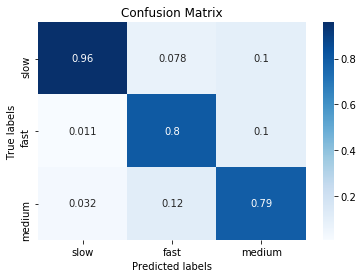

In [11]:
ax= plt.subplot()
sn.heatmap(confusion_matrix(y_true, y_pred, normalize='pred'), 
           annot=True, fmt='.2g', cmap=cm.Blues, ax = ax, cbar=True)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['slow', 'fast', 'medium']); ax.yaxis.set_ticklabels(['slow', 'fast', 'medium']);